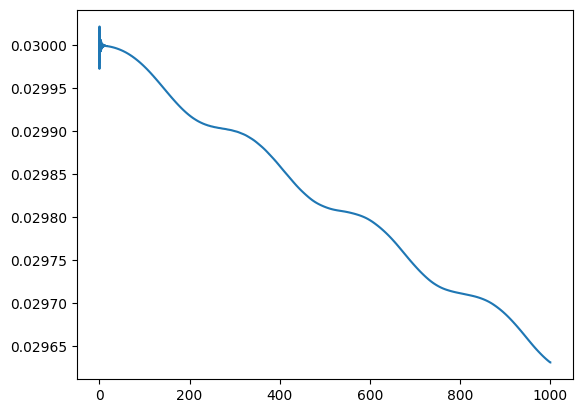

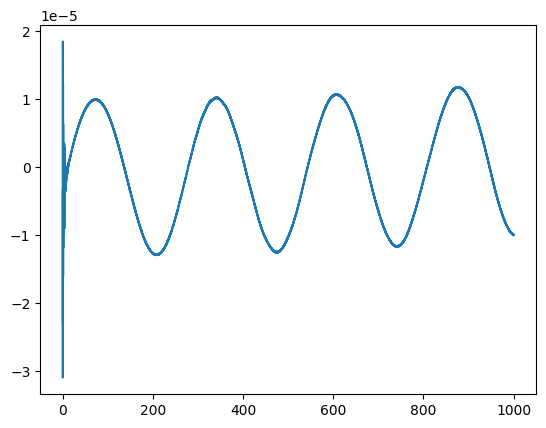

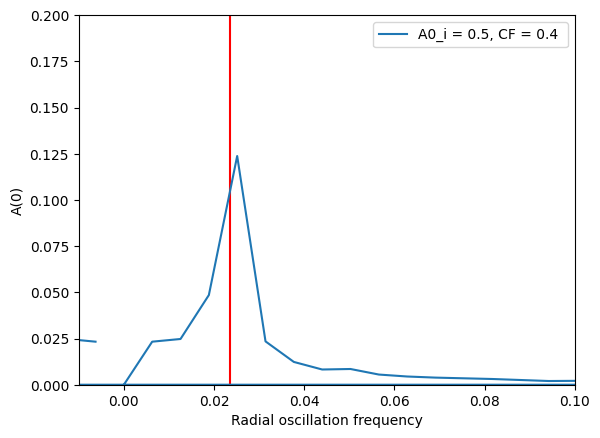

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import math

file = open('ftransf.dat', 'r')

times = []
A0vals = []

lines = file.readlines()

for l in lines:
    times.append(float(l.split('    ')[0]))
    A0vals.append(float(l.split('    ')[1]))
    
for index,n in enumerate(A0vals):
        A0vals[index] = float(n)


times_range = np.linspace(min(times), max(times), 100)
linDecay = np.poly1d(np.polyfit(times,A0vals,1))
fitted_values = linDecay(times_range)

fitted_at_times = linDecay(times)

# Calculate the differences between the actual A0vals and the fitted values
A0diffs = A0vals - fitted_at_times

A0diffs_fft = np.fft.fft(A0diffs)

sampling_interval = times[1] - times[0]  # Assumes uniform sampling
frequencies = np.fft.fftfreq(len(A0diffs), d=sampling_interval)

#plt.scatter(times, A0vals, label='Data Points')
# Plot the fitted polynomial
#plt.plot(times_range, fitted_values, color='red', label='Fitted Polynomial')
plt.plot(times, A0vals)
plt.show()
plt.plot(times, A0diffs)
plt.show()

plt.clf()

#plt.plot(wvals)
omega_exp = 0.0235
plt.axvline(x = omega_exp, color = 'red')
plt.plot(frequencies * 2 * math.pi, np.abs(A0diffs_fft), label = "A0_i = 0.5, CF = 0.4 ")
plt.xlim(-0.01, 0.1)
plt.ylim(0, 0.2)

plt.xlabel("Radial oscillation frequency")
plt.ylabel("A(0)")
plt.legend(loc='best')
plt.show()

#print(wvals)